<h1> Assignment 3</h1>

In [72]:
import numpy as np
import math
from scipy.special import jn, yn
import matplotlib.pyplot as plt

h=0.1
n=1000
a=6.12
e=5.9
E_values= np.arange(0.4, 4.0, 0.1)
c=math.sqrt(e*a/25)


def v_lj(r):
    return e*((1/r)**12 - 2*(1/r)**6)
    
def f(r,E,l):
    return -a*( E- v_lj(r) - l*(l+1)/(a*r**2))

def fn(E,l):
    r = np.zeros(n)
    u = np.zeros(n)
    W = np.zeros(n)
    r[0]= 0.5
    r[1]= 0.51
    ra=r[0]**(-5)
    rb=r[1]**(-5)
    
    u[0]= math.exp(-c * ra)
    u[1]= math.exp(-c * rb)

    W[0] = (1- (h**2) * (f(r[0],E,l)/12)*u[0])
    W[1] = (1- (h**2) * (f(r[1],E,l)/12)*u[1])
     
    for i in range(1, n-1):
        r[i+1]= (r[1] + i*h)
        W[i+1]= 2*W[i]- W[i - 1] + h**2 * f(r[i],E,l) * u[i]
        u[i+1]= W[i+1]/(1- (h**2) * (f(r[i+1],E,l)/12))

    r_a= 4
    r_b= 4.5
    ua= u[np.searchsorted(r,r_a)]
    ub= u[np.searchsorted(r,r_b)]
    pi = math.pi
    k = math.sqrt(a * E)
    gamma = r_a * ua / (r_b * ub)
    bes = gamma * jn(l, k * ra) - jn(l, k * rb)
    neu = gamma * yn(l, k * ra) - yn(l, k * rb)
    delta = math.atan(bes/neu)
    # s = 
    cs = 4 * pi * (2 * l + 1) * math.sin(delta)**2 /k**2
    return cs

In [73]:
cs_total = np.zeros(len(E_values))
for i in range(len(E_values)):
    E = E_values[i]
    cross_section=0.0
    for l in range(0,7):
        cross_section += fn(E,l)
        
    cs_total[i]=cross_section

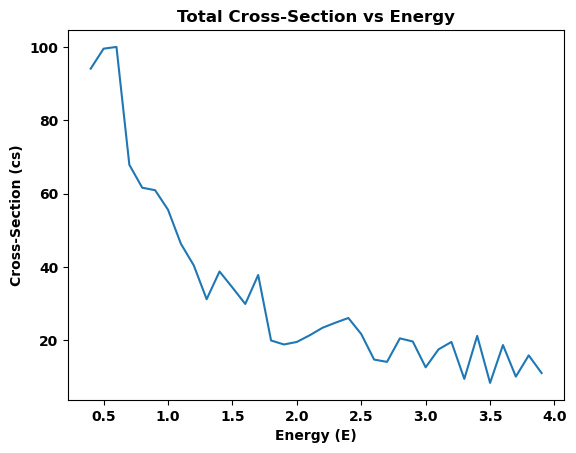

In [74]:
plt.plot(E_values, cs_total)
plt.xlabel('Energy (E)')
plt.ylabel('Cross-Section (cs)')
plt.title('Total Cross-Section vs Energy')
plt.show()

In [ ]:
import numpy as np
import math
from scipy.special import jn, yn
import matplotlib.pyplot as plt

h = 0.01
n = 5000
a = 6.12
e = 5.9

E_values = np.arange(0.1, 4.0, 0.1)

cs_values_l4 = []
# cs_values_l5 = []
# cs_values_l6 = []

# Loop over E values
for E in E_values:
    # cs_values_l4_temp = []
    # cs_values_l5_temp = []
    # cs_values_l6_temp = []

    # Loop over l values
    # for l in [4, 5, 6]:
    l=1
    c = math.sqrt(e * a / 25)
    r = np.zeros(n)
    u = np.zeros(n)
    W = np.zeros(n)
    r[0] = 0.5
    r[1] = 0.501
    ra = r[0]**(-5)
    rb = r[1]**(-5)
    u[0] = math.exp(-c * ra)
    u[1] = math.exp(-c * rb)

    def v_lj(r):
        return e * ((1 / r)**12 - 2 * (1 / r)**6)

    def f(r):
        return -a * (E - v_lj(r) - l * (l + 1) / (a * r**2))

    W[0] = (1 - (h**2) * f(r[0]) / 12) * u[0]
    W[1] = (1 - (h**2) * f(r[1]) / 12) * u[1]

    for i in range(1, n - 1):
        r[i + 1] = r[1] + i * h
        W[i + 1] = 2 * W[i] - W[i - 1] + h**2 * f(r[i]) * u[i]
        u[i + 1] = W[i + 1] / (1 - (h**2) * f(r[i + 1]) / 12)

    ra = np.abs(r - 5).argmin()
    rb = np.abs(r - 5.1).argmin()
    pi = math.pi
    k = math.sqrt(a * E)
    gamma = ra * u[ra] / (rb * u[rb])
    bes = gamma * jn(l, k * ra) - jn(l, k * rb)
    neu = gamma * yn(l, k * ra) - yn(l, k * rb)
    delta = math.atan(bes/neu)
    s = (math.sin(delta))**2
    cs = 4 * pi * (2 * l + 1) * s /k**2
    cs_values_l4.append(cs)

        # if l == 4:
        #     cs_values_l4_temp.append(cs)
        # elif l == 5:
        #     cs_values_l5_temp.append(cs)
        # elif l == 6:
        #     cs_values_l6_temp.append(cs)

    # cs_values_l4.append(np.mean(cs_values_l4_temp))
    # cs_values_l5.append(np.mean(cs_values_l5_temp))
    # cs_values_l6.append(np.mean(cs_values_l6_temp))

plt.plot(E_values, cs_values_l4, label='l=4')
# plt.plot(E_values, cs_values_l5, label='l=5')
# plt.plot(E_values, cs_values_l6, label='l=6')
plt.xlabel('E')
plt.ylabel('cs')
plt.title('cs vs E ')
plt.legend()
plt.show()
